# **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes de um shopping. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [ ]:
import numpy as np
import pandas as pd

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/machine_learning/Mall_Customers.csv',
                    sep=',', encoding='iso-8859-1')

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**ATRIBUTOS:** 

CustomerID: identificação do cliente.

Genre: Gênero.

Age: idade.

Annual Income (k$):	Rendimento anual.

Spending Score (1 a 100): Pontuação de gastos.

**IDADE**

In [9]:
import plotly.express as px

In [10]:
hist =  px.histogram (df,  x = "Age", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição das idades') 
hist.show()

**GÊNERO**

In [11]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [12]:
import seaborn as sns

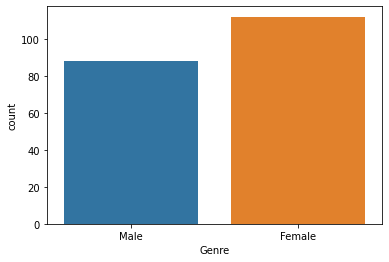

In [13]:
sns.countplot(x='Genre', data=df);

In [14]:
df.shape

(200, 5)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [15]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [16]:
df.rename(columns={'CustomerID': 'identificacao'}, inplace=True)

In [17]:
df.rename(columns={'Genre': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)

In [18]:
df.rename(columns={'Annual Income (k$)': 'rendimento','Spending Score (1-100)':'pontuacao'}, inplace=True) 

In [19]:
df.head(3)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


**Valores Missing (NAN)**

In [20]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

identificacao    0
genero           0
idade            0
rendimento       0
pontuacao        0
dtype: int64

**Análise dos tipos de atributos.**

In [21]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

identificacao     int64
genero           object
idade             int64
rendimento        int64
pontuacao         int64
dtype: object

**Dados Estatísticos**

In [22]:
df.describe()

,identificacao,idade,rendimento,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Análise dos outliers**

In [23]:
import plotly.express as px

In [24]:
boxplot = px.box(df, y="rendimento")
boxplot.show()

In [25]:
boxplot = px.box(df, y="idade")
boxplot.show()

In [26]:
boxplot = px.box(df, y="pontuacao")
boxplot.show()

## **PRÉ-PROCESSAMENTO**

In [27]:
df.head(2)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81


###**Excluir identificação do cliente**

In [28]:
df2 = df.drop(labels = 'identificacao', axis = 1)

In [29]:
df2.head(2)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81


###**Transformar variáveis categóricas em numéricas**

In [30]:
df2['genero'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [31]:
df2.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


###**Escalonamento**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [34]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## **K-MEANS COM DOIS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 

In [35]:
df2

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [36]:
dados = df2.iloc[:, [2,3]].values

In [37]:
dados

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Elbow Method**

In [38]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

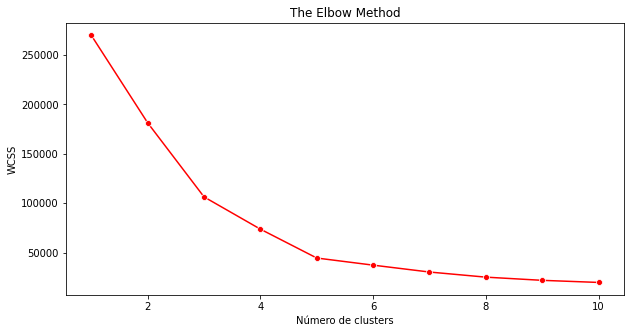

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [41]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [42]:
kmeans1 = kmeans.fit(dados)

In [43]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[48.26      , 56.48      ],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895]])

In [44]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [45]:
dados[3,:]

array([16, 77])

In [46]:
classificacao[3]

0

In [47]:
import plotly.express as px
import plotly.graph_objects as go

In [48]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Pontuação')
graf3.show()

In [49]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,2
1,0
2,2
3,0
4,2
...,...
195,1
196,3
197,1
198,3


In [50]:
df3 = pd.concat([df, agrupamento],axis=1)
df3

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [51]:
df3.iloc[150 , :]

identificacao     151
genero           Male
idade              43
rendimento         78
pontuacao          17
Grupo               3
Name: 150, dtype: object

In [52]:
df3.loc[df3.identificacao == 92] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
91,92,Male,18,59,41,0


In [53]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
...,...,...,...,...,...,...
118,119,Female,51,67,43,0
119,120,Female,50,67,57,0
120,121,Male,27,67,56,0
121,122,Female,38,67,40,0


In [54]:
grupo0.shape

(100, 6)

In [55]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,identificacao,genero,idade,rendimento,pontuacao,Grupo
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
133,134,Female,31,72,71,1
135,136,Female,29,73,88,1
137,138,Male,32,73,73,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


In [56]:
grupo1.shape

(39, 6)

## **K-MEANS COM TODOS ATRIBUTOS**

In [57]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [58]:
df2_esc.shape

(200, 4)

**Elbow Method**

In [59]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

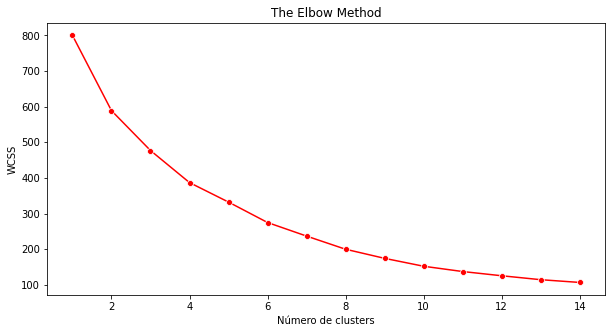

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [62]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)


In [63]:
kmeans2 = kmeans.fit(df2_esc)

In [64]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [-0.71852548, -0.46169904,  1.09030974,  1.17305816],
       [-0.88640526,  0.86299444, -0.43455895, -0.40762639],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355],
       [ 0.25517727,  0.0729628 ,  1.14279271, -1.32381522],
       [ 1.12815215, -0.77111419, -0.08465578,  0.8197479 ]])

In [65]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[1.00000000e+00, 5.59032258e+01, 4.87741935e+01, 3.88064516e+01],
       [8.33333333e-02, 3.24166667e+01, 8.91250000e+01, 8.04166667e+01],
       [5.55111512e-17, 5.08750000e+01, 4.91750000e+01, 3.97000000e+01],
       [1.66533454e-16, 2.59459459e+01, 4.22162162e+01, 5.74594595e+01],
       [5.66666667e-01, 3.98666667e+01, 9.05000000e+01, 1.61000000e+01],
       [1.00000000e+00, 2.81052632e+01, 5.83421053e+01, 7.13157895e+01]])

In [66]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([5, 5, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 3, 0, 5, 3, 5, 0, 3, 0, 5,
       2, 5, 2, 5, 2, 5, 2, 3, 0, 3, 0, 5, 2, 3, 2, 3, 2, 3, 2, 5, 0, 3,
       2, 3, 2, 3, 3, 3, 2, 5, 3, 0, 2, 0, 2, 0, 3, 0, 0, 5, 2, 2, 0, 5,
       2, 2, 5, 3, 0, 2, 2, 2, 0, 5, 2, 0, 3, 2, 0, 5, 0, 2, 3, 0, 2, 3,
       3, 2, 2, 5, 0, 2, 3, 5, 2, 3, 0, 5, 3, 2, 0, 5, 0, 3, 2, 0, 0, 0,
       0, 3, 2, 5, 3, 3, 2, 2, 2, 2, 5, 2, 1, 5, 3, 1, 0, 5, 0, 5, 4, 5,
       3, 1, 4, 1, 4, 5, 4, 1, 2, 5, 3, 1, 4, 5, 0, 1, 4, 5, 4, 5, 4, 1,
       4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 5, 4, 5, 4, 5, 4, 1,
       4, 5, 4, 5, 4, 1, 4, 1, 4, 5, 4, 5, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [67]:
classificacao2[199]

1

In [68]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,5
1,5
2,3
3,3
4,3
...,...
195,1
196,4
197,1
198,4


In [69]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [70]:
df4.iloc[125 , :]

identificacao       126
genero           Female
idade                31
rendimento           70
pontuacao            77
Grupo                 1
Name: 125, dtype: object

In [71]:
df4.loc[df4.identificacao == 76] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
75,76,Male,26,54,54,5


In [72]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
14,15,Male,37,20,13,0
18,19,Male,52,23,29,0
20,21,Male,35,24,35,0
30,31,Male,60,30,4,0
32,33,Male,53,33,4,0
42,43,Male,48,39,36,0
53,54,Male,59,43,60,0
55,56,Male,47,43,41,0


In [73]:
grupo0.shape

(31, 6)

## **K-MEANS COM PCA**

In [74]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [75]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components = 2)

In [78]:
df2_pca = pca.fit_transform(df2_esc)

In [79]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [80]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.33690046, 0.26230645])

In [81]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.5992069019819846

**Elbow Method**

In [82]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

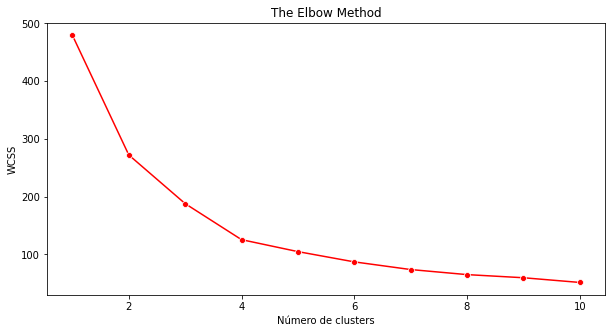

In [84]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [85]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [86]:
kmeans3 = kmeans.fit(df2_pca)

In [87]:
# Coordenadas dos Centróides
centroides = kmeans3.cluster_centers_
centroides

array([[-1.15208536, -0.48631961],
       [ 0.80089898, -0.95285608],
       [ 1.12773395,  0.75231371],
       [-0.89664028,  1.25740369]])

In [88]:
# Classificação dos dados
classificacao3 = kmeans3.labels_
classificacao3

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 3, 1, 1, 2, 3,
       1, 1, 3, 0, 2, 1, 1, 1, 2, 3, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       0, 1, 1, 3, 2, 1, 0, 3, 1, 0, 2, 3, 0, 1, 2, 3, 2, 0, 1, 2, 2, 2,
       2, 0, 1, 3, 0, 0, 1, 1, 1, 1, 3, 1, 0, 3, 0, 0, 2, 3, 2, 3, 2, 3,
       0, 0, 2, 0, 1, 3, 2, 0, 1, 3, 0, 0, 2, 3, 2, 0, 1, 3, 2, 3, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [89]:
classificacao3[2]

1

In [90]:
import plotly.express as px
import plotly.graph_objects as go

In [91]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao3)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [92]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Grupo'])
agrupamento3

,Grupo
0,0
1,0
2,1
3,0
4,1
...,...
195,3
196,2
197,3
198,2


In [93]:
df5 = pd.concat([df, agrupamento3],axis=1)
df5

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [94]:
df5.iloc[125 , :]

identificacao       126
genero           Female
idade                31
rendimento           70
pontuacao            77
Grupo                 0
Name: 125, dtype: object

In [95]:
df5.loc[df5.identificacao == 76] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
75,76,Male,26,54,54,3


In [96]:
grupo0 = df5.loc[df5.Grupo == 0]
grupo0 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
...,...,...,...,...,...,...
161,162,Female,29,79,83,0
163,164,Female,31,81,93,0
165,166,Female,36,85,75,0
167,168,Female,33,86,95,0


In [97]:
grupo0.shape

(61, 6)

## **ALGORITMO HIERÁRQUICO COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html 

In [98]:
df2.head()

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [99]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [100]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [101]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA(n_components = 2)

In [103]:
df2_pca = pca.fit_transform(df2_esc)

In [104]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

**Dendograma**

In [105]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

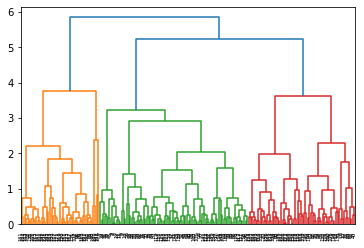

In [106]:
dendrograma = dendrogram(linkage(df2_pca, method = 'complete'))

In [107]:
from sklearn.cluster import AgglomerativeClustering

In [108]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')
classificacao4 = hier.fit_predict(df2_pca)

In [109]:
classificacao4

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0,
       2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 0])

In [110]:
import plotly.express as px

In [111]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao4)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

**Agrupamento**

In [112]:
agrupamento4 = pd.DataFrame(classificacao4, columns = ['Grupo'])
agrupamento4

,Grupo
0,2
1,2
2,2
3,2
4,2
...,...
195,0
196,1
197,0
198,0


In [113]:
df6 = pd.concat([df, agrupamento4],axis=1)
df6

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [114]:
df6.loc[df6.identificacao == 22] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
21,22,Male,25,24,73,2


In [115]:
grupo2 = df6.loc[df6.Grupo == 2]
grupo2 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
159,160,Female,30,78,73,2
168,169,Female,36,87,27,2
180,181,Female,37,97,32,2
184,185,Female,41,99,39,2


## **ALGORITMO HIERÁRQUICO: todos atributos**






In [116]:
df2.head()

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [117]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [118]:
df2_esc.shape

(200, 4)

**Dendograma**

In [119]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

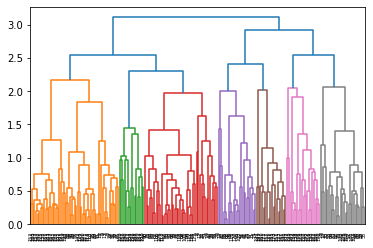

In [120]:
dendrograma = dendrogram(linkage(df2_esc, method = 'average'))

In [121]:
from sklearn.cluster import AgglomerativeClustering

In [122]:
hier = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage = 'average')
classificacao5 = hier.fit_predict(df2_esc)

In [123]:
classificacao5

array([5, 5, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 4, 0, 5, 5, 4, 5, 1, 0, 5, 5,
       4, 5, 4, 5, 4, 5, 4, 0, 1, 0, 1, 5, 4, 0, 4, 0, 4, 0, 4, 5, 1, 0,
       4, 0, 4, 0, 0, 0, 4, 5, 0, 1, 4, 1, 4, 1, 0, 1, 1, 5, 4, 4, 1, 5,
       4, 4, 5, 0, 1, 4, 4, 4, 1, 5, 4, 1, 0, 4, 1, 1, 1, 4, 0, 1, 4, 0,
       4, 4, 4, 5, 1, 4, 4, 5, 4, 0, 1, 5, 0, 4, 1, 5, 1, 0, 4, 1, 1, 1,
       1, 0, 4, 5, 0, 0, 4, 4, 4, 4, 5, 4, 4, 2, 0, 0, 3, 2, 3, 2, 3, 2,
       0, 0, 3, 0, 6, 2, 3, 0, 6, 2, 0, 0, 3, 2, 3, 0, 6, 2, 3, 2, 6, 0,
       6, 0, 3, 0, 3, 0, 6, 0, 3, 0, 3, 0, 3, 0, 6, 2, 3, 2, 3, 2, 6, 0,
       3, 2, 3, 2, 6, 0, 3, 0, 6, 2, 6, 2, 6, 0, 6, 0, 3, 0, 6, 0, 6, 2,
       3, 2])

**Agrupamento**

In [124]:
agrupamento5 = pd.DataFrame(classificacao5, columns = ['Grupo'])
agrupamento5

,Grupo
0,5
1,5
2,4
3,0
4,4
...,...
195,0
196,6
197,2
198,3


In [125]:
df7 = pd.concat([df, agrupamento5],axis=1)
df7

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,6
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [126]:
df7.loc[df7.identificacao == 131]

,identificacao,genero,idade,rendimento,pontuacao,Grupo
130,131,Male,47,71,9,3


In [127]:
grupo4 = df7.loc[df7.Grupo == 6]
grupo4.head(2)

,identificacao,genero,idade,rendimento,pontuacao,Grupo
136,137,Female,44,73,7,6
140,141,Female,57,75,5,6


In [128]:
grupo4.shape

(15, 6)

## **ALGORITMO DBSCAN COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html 

In [129]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [130]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA(n_components = 2)

In [133]:
df2_pca = pca.fit_transform(df2_esc)

In [134]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [135]:
from sklearn.cluster import DBSCAN

In [136]:
dbscan = DBSCAN(eps = 0.32, min_samples=4)
dbscan.fit(df2_pca)

DBSCAN(eps=0.32, min_samples=4)

In [137]:
classificacao6 = dbscan.labels_
classificacao6

array([ 0,  0, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  3,  1,  2,  0, -1,
        0,  2,  1,  0,  0,  3,  0,  3,  0, -1,  0,  0,  1, -1,  1, -1,  0,
        3,  1, -1, -1,  0,  1,  3,  0,  2,  4,  5, -1,  0,  4,  4,  4,  0,
       -1,  4,  2,  0,  2,  0,  2,  4,  2,  2,  0,  5,  0,  2,  0,  0,  5,
        0,  4,  2,  0,  0,  0,  2,  0,  0,  2,  0,  0,  2,  2,  2,  0,  0,
        2,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        2,  0,  2,  0,  2,  2,  2,  2,  2,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  0,  2,  0,  0,  0,  6,  0,
        2,  0,  6,  0, -1,  0,  0,  0,  6, -1,  2,  0, -1,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  6,  0,  2,  0,  2,  0,  2, -1,
        2,  0,  2,  0,  2,  0, -1,  0, -1,  0,  2,  0, -1,  0,  2, -1,  2,
        0,  2,  0,  2,  0, -1,  0,  2,  0,  6, -1, -1, -1])

In [138]:
import plotly.express as px

In [139]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao6)
graf.update_layout(width=800,height=500,title_text='Agrupamento DBSCAN')
graf.show()

**Agrupamento**

In [140]:
agrupamento6 = pd.DataFrame(classificacao6, columns = ['Grupo'])
agrupamento6

,Grupo
0,0
1,0
2,-1
3,1
4,-1
...,...
195,0
196,6
197,-1
198,-1


In [141]:
df8 = pd.concat([df, agrupamento6],axis=1)
df8

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,6
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [142]:
df8.loc[df8.identificacao == 5] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
4,5,Female,31,17,40,-1


In [143]:
ruido = df8.loc[df8.Grupo == -1]
ruido 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
2,3,Female,20,16,6,-1
4,5,Female,31,17,40,-1
6,7,Female,35,18,6,-1
7,8,Female,23,18,94,-1
8,9,Male,64,19,3,-1
9,10,Female,30,19,72,-1
10,11,Male,67,19,14,-1
16,17,Female,35,21,35,-1
26,27,Female,45,28,32,-1
30,31,Male,60,30,4,-1


In [144]:
ruido.shape

(28, 6)

## **ALGORITMO DBSCAN: todos atributos**

In [145]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [146]:
df2_esc.shape

(200, 4)

In [147]:
from sklearn.cluster import DBSCAN

In [148]:
dbscan = DBSCAN(eps = 0.73, min_samples=4)
dbscan.fit(df2_esc)

DBSCAN(eps=0.73, min_samples=4)

In [149]:
classificacao7 = dbscan.labels_
classificacao7

array([-1,  0, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  0,  1,
        0,  2, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  2,  1,  2,  1,  2,  1,  2,  2,  3,  1,  1,  2,  3,  1,  1,
        3,  1,  2,  1,  1,  1,  2,  3,  1,  2,  1,  1,  2,  2,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  3,  2,  1,  1,  3,  1,  1,  2,  3,  1,  1,
        2,  3,  2,  1,  1,  2,  2,  2,  2,  1,  1,  3,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  4,  1,  1,  2,  4,  2,  4,  2,  4,  1,  1,  5,  1,
        6,  4,  5,  1,  6,  4,  1,  1,  5,  4,  2,  1,  6,  4,  2,  4,  6,
        1,  6,  1,  2,  1,  2,  1,  1,  1,  5,  1,  2,  1,  2,  1,  6,  4,
        2,  4,  2,  4,  6,  1,  2,  4,  2,  4,  6,  1,  2,  1,  6,  4,  6,
        4,  6,  1,  6,  1, -1,  1, -1,  1, -1, -1, -1, -1])

**Agrupamento**

In [150]:
agrupamento7 = pd.DataFrame(classificacao7, columns = ['Grupo'])
agrupamento7

,Grupo
0,-1
1,0
2,-1
3,1
4,1
...,...
195,1
196,-1
197,-1
198,-1


In [151]:
df9 = pd.concat([df, agrupamento7],axis=1)
df9

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [152]:
df9.loc[df9.identificacao == 127] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
126,127,Male,43,71,35,2


In [153]:
ruido = df9.loc[df9.Grupo == -1]
ruido 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,-1
2,3,Female,20,16,6,-1
6,7,Female,35,18,6,-1
8,9,Male,64,19,3,-1
10,11,Male,67,19,14,-1
11,12,Female,35,19,99,-1
14,15,Male,37,20,13,-1
19,20,Female,35,23,98,-1
20,21,Male,35,24,35,-1
30,31,Male,60,30,4,-1


In [154]:
ruido.shape

(18, 6)

In [155]:
grupo = df9.loc[df9.Grupo == 1]
grupo.shape

(94, 6)

## **ALGORITMO MEANSHIFT COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [156]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [157]:
df2_esc.shape

(200, 4)

**Componentes Principais**

In [158]:
from sklearn.decomposition import PCA

In [159]:
pca = PCA(n_components = 2)

In [160]:
df2_pca = pca.fit_transform(df2_esc)

In [161]:
df2_pca

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

**MeanShift**

In [162]:
from sklearn.cluster import MeanShift

In [163]:
mean = MeanShift(bandwidth=1, cluster_all=True)

In [164]:
mean.fit(df2_pca)

MeanShift(bandwidth=1)

In [165]:
classificacao8 = mean.labels_
classificacao8

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 1, 1, 3, 2, 0, 1, 0, 2, 3, 2, 0, 1,
       0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 3, 3,
       3, 2])

In [166]:
import plotly.express as px

In [167]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao8)
graf.update_layout(width=800,height=500,title_text='Agrupamento MeanShift')
graf.show()

**Agrupamento**

In [168]:
agrupamento8 = pd.DataFrame(classificacao8, columns = ['Grupo'])
agrupamento8

,Grupo
0,1
1,1
2,0
3,1
4,1
...,...
195,2
196,3
197,3
198,3


In [169]:
df9 = pd.concat([df, agrupamento8],axis=1)
df9

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,3
198,199,Male,32,137,18,3


In [170]:
df9.loc[df9.identificacao == 19] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
18,19,Male,52,23,29,0


In [171]:
ruido = df9.loc[df9.Grupo == -1]
ruido 

,identificacao,genero,idade,rendimento,pontuacao,Grupo


In [172]:
grupo = df9.loc[df9.Grupo == 3]
grupo.shape

(16, 6)

## **ALGORITMO MEANSHIFT: todos atributos**

In [173]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [174]:
df2

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [175]:
df2_esc.shape

(200, 4)

In [176]:
from sklearn.cluster import MeanShift

In [177]:
mean = MeanShift(bandwidth=1.5, cluster_all=True)

In [178]:
mean.fit(df2_esc)

MeanShift(bandwidth=1.5)

In [179]:
classificacao9 = mean.labels_
classificacao9

array([1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 4, 1, 2, 1, 4, 1,
       0, 3, 4, 3, 0, 1, 4, 3, 0, 1, 0, 3, 4, 1, 2, 3, 0, 1, 4, 1, 0, 3,
       0, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 0, 1, 4, 1, 4, 1, 0, 3,
       4, 1, 4, 1, 0, 3, 4, 3, 0, 1, 0, 1, 4, 3, 0, 3, 4, 3, 4, 3, 4, 1,
       4, 1])

**Agrupamento**

In [180]:
agrupamento9 = pd.DataFrame(classificacao9, columns = ['Grupo'])
agrupamento9

,Grupo
0,1
1,1
2,0
3,0
4,0
...,...
195,3
196,4
197,1
198,4


In [181]:
df10 = pd.concat([df, agrupamento9],axis=1)
df10

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [182]:
df10.loc[df10.identificacao == 45] 

,identificacao,genero,idade,rendimento,pontuacao,Grupo
44,45,Female,49,39,28,0


In [183]:
grupo = df10.loc[df10.Grupo == 4]
grupo.shape

(21, 6)

## **K-PROTOTYPES**

Algoritmo para agrupamento de dados mistos (categóricos e numéricos). Documentação: https://pypi.org/project/kmodes/

---



In [184]:
df.head()

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [185]:
dados= df[['genero','idade','rendimento', 'pontuacao']]
dados

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [186]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [187]:
from kmodes.kprototypes import KPrototypes

In [188]:
kproto = KPrototypes(n_clusters= 4)

In [189]:
kproto1 = kproto.fit_predict(dados, categorical=[0])

In [190]:
kproto1

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=uint16)

In [191]:
kproto1[4]

0

In [192]:
agrupamento = pd.DataFrame(kproto1, columns = ['grupo'])
agrupamento

,grupo
0,1
1,1
2,0
3,1
4,0
...,...
195,2
196,3
197,2
198,3


In [193]:
df_final = pd.concat([df, agrupamento],axis=1)

In [194]:
df_final.head()

,identificacao,genero,idade,rendimento,pontuacao,grupo
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


In [195]:
df_final.iloc[132 , :]

identificacao       133
genero           Female
idade                25
rendimento           72
pontuacao            34
grupo                 3
Name: 132, dtype: object

In [196]:
grupo = df_final.loc[df_final.grupo ==3]
grupo.head()

,identificacao,genero,idade,rendimento,pontuacao,grupo
124,125,Female,23,70,29,3
126,127,Male,43,71,35,3
128,129,Male,59,71,11,3
130,131,Male,47,71,9,3
132,133,Female,25,72,34,3


In [197]:
grupo.shape

(38, 6)

## **K-MODES**

Algoritmo para agrupamento de dados categóricos. Documentação: https://pypi.org/project/kmodes/

https://www.kaggle.com/datasets/yukeshmarudhasalam/bankmarketing 

In [198]:
import numpy as np
import pandas as pd

In [199]:
import warnings
warnings.filterwarnings("ignore")

In [201]:
df = pd.read_csv('/content/drive/MyDrive/machine_learning/bankmarketing.csv',
                    sep=',', encoding='iso-8859-1')

In [202]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [203]:
df.shape

(41188, 21)

In [ ]:
df.columns

In [205]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

**Variáveis**

**age** : idade (numérica)

**job** : tipo de trabalho (categorias: 'admin.','blue-collar','entrepreneur(empreendedor)','housemaid','management (gestão)','retired (aposentado)','self-employed (autônomo)','services','student','technician','unemployed (desempregado)','unknown')

**marital** : estado civil (categorias: 'divorced','married','single','unknown'; obs.: 'divorced' significa divorciado ou viúvo (a))

**education**: nível escolar (categorias: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

**default**: inadimplência (categorias: 'no','yes','unknown')

**housing**: crédito de habitação (categorias: 'no','yes','unknown')

**loan**: empréstimo pessoal (categorias: 'no','yes','unknown')

**contact**: contato (categorias: 'cellular','telephone')

**month**: último mês de contato (categorias: 'jan', 'feb', 'mar', 'april', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')

**day_of_week**: último dia de contato (categorical: 'mon','tue','wed','thu','fri')

**poutcome:** resultado do marketing anterior (categorical: 'failure','nonexistent','success')

In [206]:
df2 = df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [207]:
df3 = df2.copy()

In [208]:
df3['faixa_idade'] = pd.cut(df3['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [209]:
df3  = df3.drop('age',axis = 1)

In [210]:
df3.head(30)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,faixa_idade
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60
5,services,married,basic.9y,unknown,no,no,telephone,may,mon,nonexistent,40-50
6,admin.,married,professional.course,no,no,no,telephone,may,mon,nonexistent,50-60
7,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,nonexistent,40-50
8,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent,20-30
9,services,single,high.school,no,yes,no,telephone,may,mon,nonexistent,20-30


In [211]:
df3.dtypes

job              object
marital          object
education        object
default          object
housing          object
loan             object
contact          object
month            object
day_of_week      object
poutcome         object
faixa_idade    category
dtype: object

In [212]:
df3.isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
faixa_idade    0
dtype: int64

### **Pré-processamento**

**Transformação para codificação numérica**

In [213]:
from sklearn import preprocessing
df4 = df3.apply(preprocessing.LabelEncoder().fit_transform)
df4.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,faixa_idade
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


### **Instalação**

In [214]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [215]:
from kmodes.kmodes import KModes

In [216]:
?KModes

### **NÚMERO DE CLUSTERS "IDEAL"**

In [217]:
custo = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, n_init = 2, verbose=1)
    kmode.fit_predict(df4)
    custo.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0
Initiali

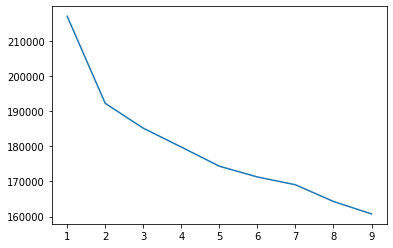

In [218]:
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,10,1)])
plt.plot(y,custo);

In [219]:
kmd = KModes(n_clusters=4, verbose=1)
kmd1 = kmd.fit_predict(df4)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


In [220]:
kmd1

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [221]:
kmd1[40000]

2

In [222]:
agrupamento = pd.DataFrame(kmd1, columns = ['grupo'])
agrupamento

,grupo
0,1
1,1
2,0
3,0
4,1
...,...
41183,0
41184,1
41185,0
41186,1


In [223]:
df5 = pd.concat([df2, agrupamento],axis=1)

In [224]:
df5.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,grupo
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,1


In [225]:
df5.iloc[33284 , :]

age                             38
job                     technician
marital                    married
education      professional.course
default                         no
housing                         no
loan                            no
contact                   cellular
month                          may
day_of_week                    tue
poutcome               nonexistent
grupo                            0
Name: 33284, dtype: object

In [226]:
grupo = df5.loc[df5.grupo == 3]
grupo.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,grupo
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,nonexistent,3
13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,nonexistent,3
28,54,technician,single,university.degree,unknown,no,no,telephone,may,mon,nonexistent,3
53,53,admin.,single,professional.course,no,no,no,telephone,may,mon,nonexistent,3
55,55,technician,married,professional.course,unknown,yes,no,telephone,may,mon,nonexistent,3


In [227]:
grupo.shape

(3570, 12)

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

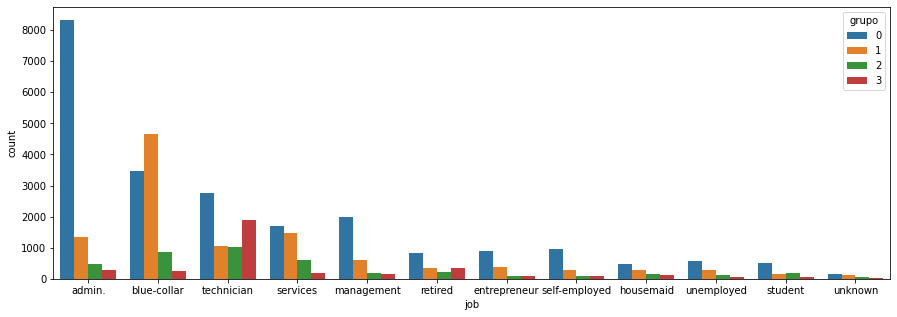

In [229]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df5['job'], order=df5['job'].value_counts().index, hue=df5['grupo'])
plt.show()